<a href="https://colab.research.google.com/github/jear2412/ModEpiAyudantias/blob/main/BInomialMCEpiModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
''' Binomial Markov Chain Epidemiological Models

Models:
Greenwood Model 1931
Reed-Frost Model 1952 '''

import numpy as np
import scipy
import scipy.stats
import seaborn as sns 
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd


sns.set_theme(style="darkgrid")

In [46]:
#Greenwood Model

'''
Simulacion de modelo Greenwood con 3 estados: S, E , R 
p es la probabilidad de mantenerse como susceptible / no ser infectado

Greenwood supone que la probabilidad de transicion es binomial S_{n+1}~(s_n, p)

S_n es la cantidad de susceptibles en el paso n y hay independencia respecto a 
la cantidad de infeccciosos que hay en la poblacion.

'''
def simGM( n, x0, p ):
  xt=np.zeros((n+1,3))
  xt[0, :]=x0
  for i in range(1, n+1):
    xt[i,0]= scipy.stats.binom.rvs( n=int(xt[i-1,0]), p=p , size=1)
    xt[i,1]= xt[i-1, 0]- xt[i, 0]
    xt[i,2]= xt[i-1,2]+xt[i-1, 1]

  return xt 

 

In [57]:
#Ejemplo 

n=100
x0= np.array([  n, 1, 0   ])
p=0.9
xt=simGM(n, x0, p)


Text(0.5, 1.0, 'Susceptibles')

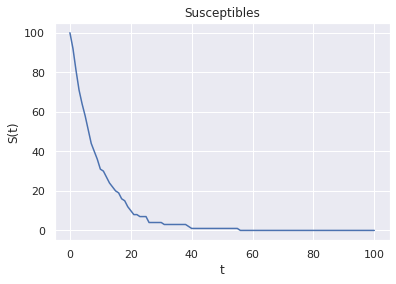

In [58]:
#Susceptibes
plt.plot( xt[:,0] )
plt.xlabel('t')
plt.ylabel('S(t)')
plt.title('Susceptibles')

Text(0.5, 1.0, 'Infectados')

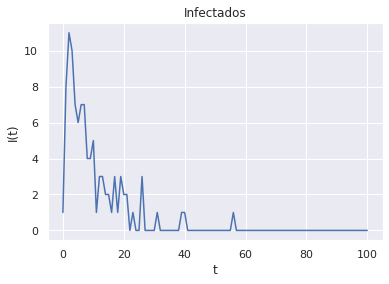

In [60]:
#Infectados
plt.plot( xt[:,1] )
plt.xlabel('t')
plt.ylabel('I(t)')
plt.title('Infectados')

Text(0.5, 1.0, 'Removidos')

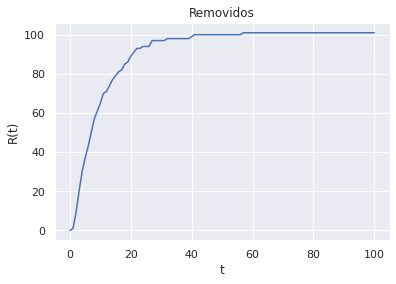

In [61]:
#Removidos
plt.plot( xt[:,2] )
plt.xlabel('t')
plt.ylabel('R(t)')
plt.title('Removidos')

In [84]:
# Reed-Frost

'''
Simulacion de modelo Reed-Frost con 3 estados: S, E , R 
p es la probabilidad de mantenerse como susceptible / no ser infectado

Reed-Frost supone que la probabilidad de transicion es binomial S_{n+1}| Sn, It~(S_n, p^I_n)

q= prob de contacto adecuado, es decir infectar a un susceptible
p=1-q no hay contacto adecuado

p^I_n que no tuviese contacto adecuado con ninguno de los infectados, por lo tanto
sigue siendo susceptible

S_n es la cantidad de susceptibles en el paso n y 


'''

def simRF( n, x0, p ):
  xt=np.zeros((n+1,3))
  xt[0, :]=x0
  for i in range(1, n+1):
    xt[i,0]= scipy.stats.binom.rvs( n=int(xt[i-1,0]), p= p**(xt[i-1,1]) , size=1)
    xt[i,1]= xt[i-1, 0]- xt[i, 0]
    xt[i,2]= xt[i-1,2]+xt[i-1, 1]

  return xt 


In [82]:
n=100
x0= np.array([  n, 1, 0   ])
p=0.97
xt=simRF(n, x0, p)


Text(0.5, 1.0, 'Susceptibles')

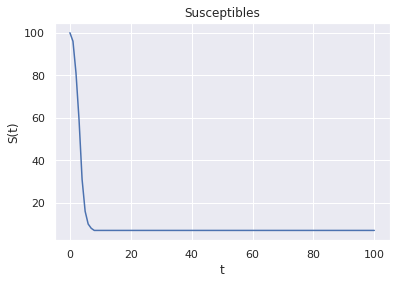

In [79]:
#Susceptibes
plt.plot( xt[:,0] )
plt.xlabel('t')
plt.ylabel('S(t)')
plt.title('Susceptibles')

Text(0.5, 1.0, 'Infectados')

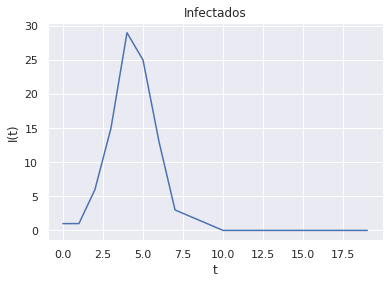

In [83]:
#Infectados
plt.plot( xt[:20,1] )
plt.xlabel('t')
plt.ylabel('I(t)')
plt.title('Infectados')

Text(0.5, 1.0, 'Removidos')

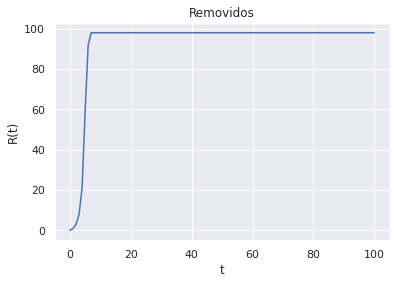

In [70]:
#Removidos
plt.plot( xt[:,2] )
plt.xlabel('t')
plt.ylabel('R(t)')
plt.title('Removidos')